# Predição de Sobrevivência no Naufrágio do Titanic Utilizando Machine Learning

O RMS Titanic foi um luxuoso navio britânico construído em 1911. Devido à sua grandiosidade, recebeu o título de 'inafundável'. Entretanto, em 15 de abril de 1912, após dois dias de viagem rumo a Nova Iorque, partindo de Southampton, o Titanic colidiu com um iceberg e afundou, resultando na morte de 1.500 pessoas. Um pouco mais de 700 pessoas sobreviveram, a maioria mulheres e crianças, pois as regras de evacuação priorizavam esses grupos.

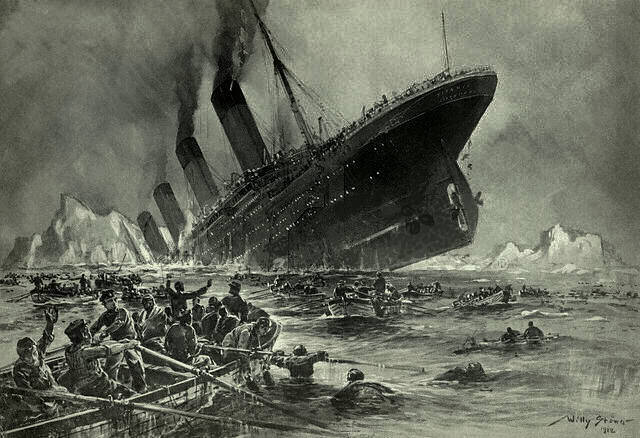

## Objetivo

O objetivo desse trabalho é utilizar diferentes modelos de aprendizado de maquina para avaliar a probabilidade de um individuo com determinadas caracteristicas seria capaz de sobreviver ao naufrágio.

## Obtenção dos dados

Os dados foram obtidos a partir do kaggle (https://www.kaggle.com/competitions/titanic/data).

## Entendendo os dados

- **survival** - se o tripulante ou passageiro sobreviveu.
- **pclass** - A classe do passageiro, é uma proxy que define qual o nível econômico e social em que o passageiro se encontra.
- **sex** - sexo.
- **Age** - idade
- **sibsp** - Número de irmãos/cônjuges estão a bordo com o passageiro.
- **parch** - Número de pais/filhos que estão a bordo com o passageiro, mas nesse caso é parentesco com pais e filhos.
- **ticket** - Número do bilhete do passageiro.
- **fare** - valor da tarifa paga pelo passageiro (em libras esterlinas).
- **cabin** - Número da cabine do passageiro.
- **embarked** - Porto de embarque do passageiro, representado por letras, C:Cherbourg, Q: Queenstown, S: Southampton.

In [1]:
# Carregando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Carregando os dados
train = pd.read_csv("C:\\Users\\Max\\Downloads\\titanic\\train.csv")
test = pd.read_csv("C:\\Users\\Max\\Downloads\\titanic\\test.csv")
df = pd.read_csv("C:\\Users\\Max\\Desktop\\Data Science\\Python\\DataSets\\titanic.csv")

In [8]:
# Formato dos dataframe
train.shape

(891, 12)

In [9]:
test.shape

(418, 11)

O dataset de treino possui 891 observações e 12 colunas, e o dataset de test possui 418 observações e 11 colunas.

In [10]:
# As dez primeiras linhas
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [12]:
# Verificando se há dados inconsistentes
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Podemos perceber que algumas colunas possuem dados NAN, podemos tratar isso de duas formas, ou eliminando as colunas ou preenchendo com outro valor.

As colunas cabin, Age, Embarked e Fare possuem dados faltantes.

In [12]:
# Função para determinar a quantidade de valores missing
def display_missing(df):    
    for col in df.columns.tolist():          
        print('{} column missing values: {}'.format(col, df[col].isnull().sum()))
    print('\n')

In [37]:
print('-Missing values in train')
display_missing(train)
print('-Missing values in test')
display_missing(test)

-Missing values in train
PassengerId column missing values: 0
Survived column missing values: 0
Pclass column missing values: 0
Name column missing values: 0
Sex column missing values: 0
Age column missing values: 177
SibSp column missing values: 0
Parch column missing values: 0
Ticket column missing values: 0
Fare column missing values: 0
Cabin column missing values: 687
Embarked column missing values: 2


-Missing values in test
PassengerId column missing values: 0
Pclass column missing values: 0
Name column missing values: 0
Sex column missing values: 0
Age column missing values: 86
SibSp column missing values: 0
Parch column missing values: 0
Ticket column missing values: 0
Fare column missing values: 1
Cabin column missing values: 327
Embarked column missing values: 0




Vamos preencher os valores missing da coluna Age pela mediana, mas não podemos colocar todos os valores faltantes somente com um valor da mediana, então o que vamos fazer  é descobrir qual outra coluna possui uma alta corelação com a coluna Age e extratificar cada mediana.

In [3]:
df_all_corr = df.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
df_all_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
df_all_corr[df_all_corr['Feature 1'] == 'Age']

,Feature 1,Feature 2,Correlation Coefficient
5,Age,Age,1.000000
12,Age,Pclass,0.369226
16,Age,SibSp,0.308247
21,Age,Parch,0.189119
26,Age,Fare,0.096067
32,Age,Survived,0.077221
36,Age,PassengerId,0.036847


Podemos ver que que Pclass possui a mais alta correlação com Age entre as demais variaveis, logo vamos dividir Age entre cada grupo e usar a mediana para preencher esses valores missing, tanto do treino quanto do teste.

In [4]:
age_pclass = df.groupby(['Sex', 'Pclass']).median()['Age']
print(age_pclass)
# Inserindo esses valores no dataframe original
df['Age'] = df.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64


A coluna embarked possui apenas dois valores faltantes:

In [4]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Se buscarmos esses nomes do google, descobrimos que Martha Eevelyn estava viajando com sua empregada e que ambas embarcaram Em Southampton, então vamos completar a tabela com esse valor.

In [5]:
df['Embarked'] = df['Embarked'].fillna('S')

A coluna Fare possui somente um valor missing, podemos assumir que o vamos da tarifa está relacionada aos familiares, Parch e SibSp, e também relacionada a classe, Pclass.

In [6]:
fare1 = df.groupby(['Pclass', 'Parch', 'SibSp']).Fare.median()[3][0][0]
fare1

7.8958

Estamos pegando a mediana da 3 classe com nenhum filho ou parente.

In [7]:
df['Fare'] = df['Fare'].fillna(fare1)

A coluna Cabin também possui dados faltando, entretanto nesse caso vamos apenas remove-la.

In [12]:
df = df.drop('Cabin', axis = 1)
df = df.drop('Name', axis = 1)
df = df.drop('Ticket', axis = 1)
df = df.drop('PassengerId', axis = 1)

KeyError: "['Cabin'] not found in axis"

In [9]:
# Convertendo a coluna embarked para tipo categorico
df['Embarked'] = df['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

Convertendo a coluna sex para 1 para male e 0 para female

In [10]:
df['Sex'] = df['Sex'].apply(lambda x: 1 if x == 'male' else 0)

In [12]:
# Descrição das variáveis
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.112424,0.523008,0.381594,32.204208,0.361392
std,257.353842,0.486592,0.836071,13.304424,1.102743,0.806057,49.693429,0.635673
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,21.500000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,36.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,2.000000


## Análise exploratória de dados (EDA)

In [68]:
# Cria uma função para gráficos
def hist_plot(variavel):
    var = df[variavel]
    sns.histplot(var)
    plt.ylabel('Frequência')
    plt.title(variavel)
    print(f'{variavel}: \n {var.value_counts()}')
    plt.show()

Parch: 
 0    1002
1     170
2     113
3       8
5       6
4       6
6       2
9       2
Name: Parch, dtype: int64


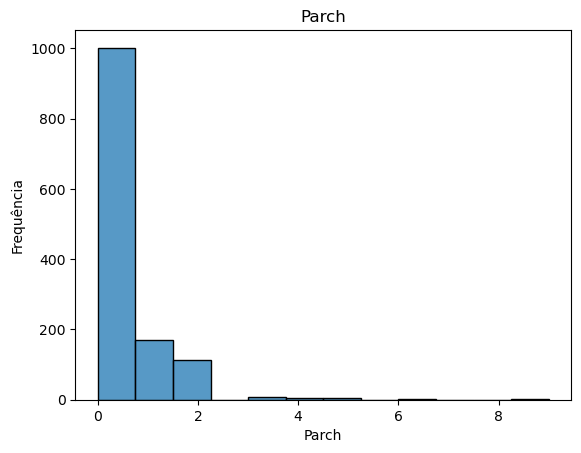

Pclass: 
 3    709
1    323
2    277
Name: Pclass, dtype: int64


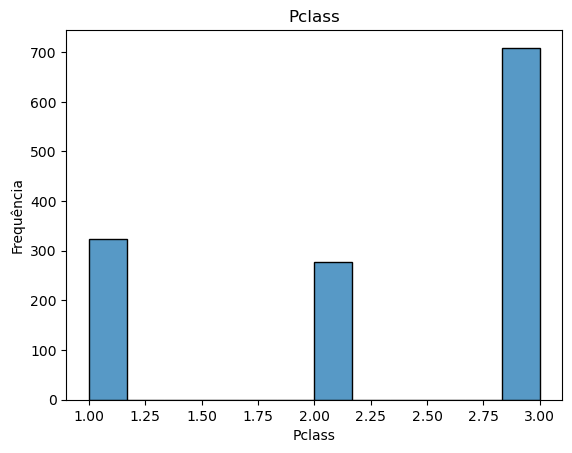

SibSp: 
 0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: SibSp, dtype: int64


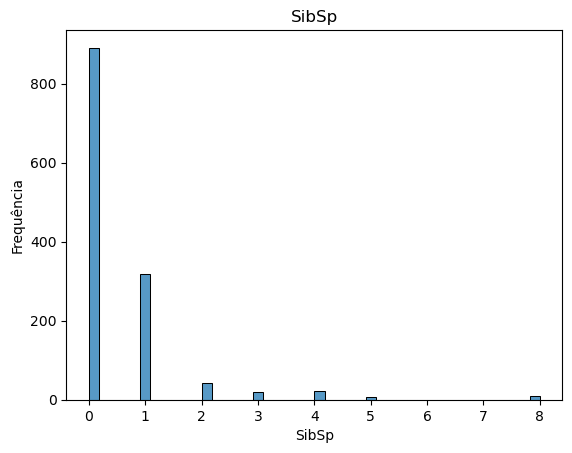

Survived: 
 0.0    549
1.0    342
Name: Survived, dtype: int64


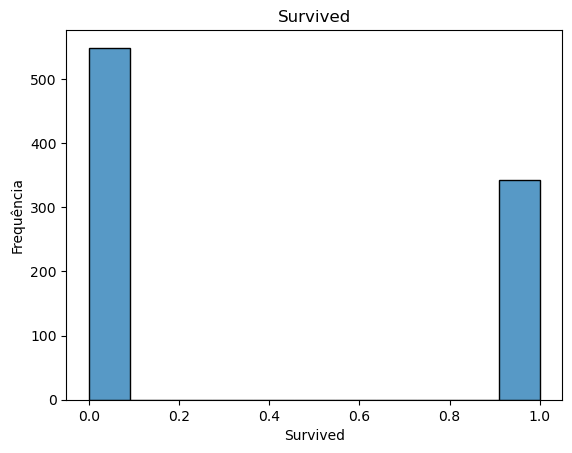

Embarked: 
 S    916
C    270
Q    123
Name: Embarked, dtype: int64


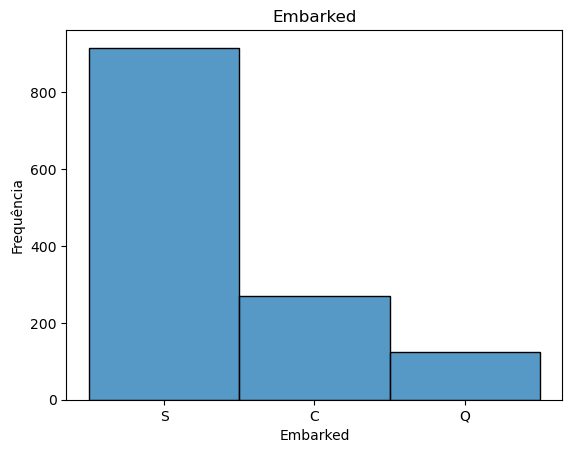

Sex: 
 male      843
female    466
Name: Sex, dtype: int64


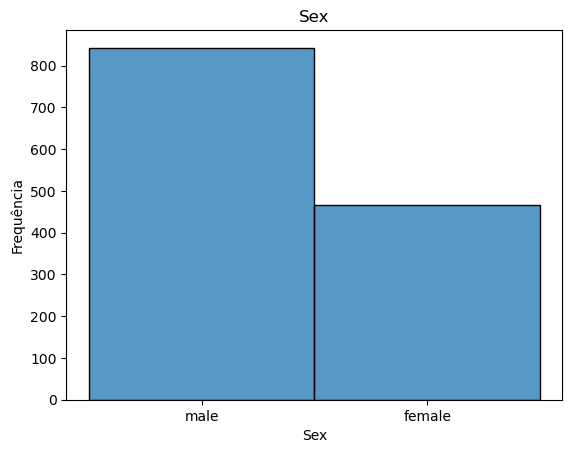

In [69]:
variaveis1 = ['Parch', 'Pclass', 'SibSp', 'Survived', 'Embarked', 'Sex']
for var in variaveis1:
    hist_plot(var)

In [80]:
variaveis2 = ["Name", "Ticket"]
for var in variaveis2:
    print(df[var].value_counts())

Connolly, Miss. Kate                                   2
Kelly, Mr. James                                       2
Braund, Mr. Owen Harris                                1
Johnson, Master. Harold Theodor                        1
Gustafsson, Mr. Alfred Ossian                          1
                                                      ..
Carter, Miss. Lucile Polk                              1
Silvey, Mr. William Baird                              1
Kallio, Mr. Nikolai Erland                             1
Louch, Mrs. Charles Alexander (Alice Adelaide Slow)    1
Peter, Master. Michael J                               1
Name: Name, Length: 1307, dtype: int64
CA. 2343        11
CA 2144          8
1601             8
PC 17608         7
S.O.C. 14879     7
                ..
113792           1
36209            1
323592           1
315089           1
359309           1
Name: Ticket, Length: 929, dtype: int64


Fare: 
 8.0500     60
13.0000    59
7.7500     55
26.0000    50
7.8958     49
           ..
7.7417      1
8.1583      1
8.4583      1
7.8000      1
7.7208      1
Name: Fare, Length: 281, dtype: int64


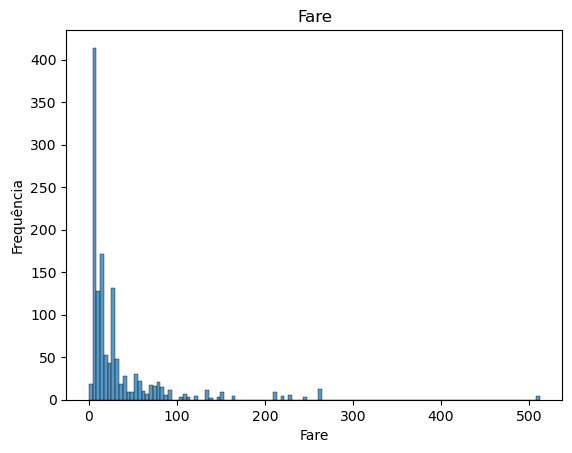

Age: 
 25.00    178
22.00    107
24.00     47
42.00     46
36.00     42
        ... 
70.50      1
0.67       1
20.50      1
24.50      1
38.50      1
Name: Age, Length: 99, dtype: int64


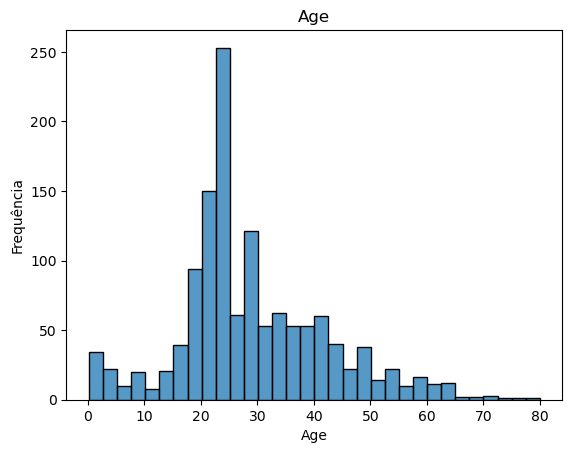

PassengerId: 
 1       1
861     1
879     1
878     1
877     1
       ..
436     1
435     1
434     1
433     1
1309    1
Name: PassengerId, Length: 1309, dtype: int64


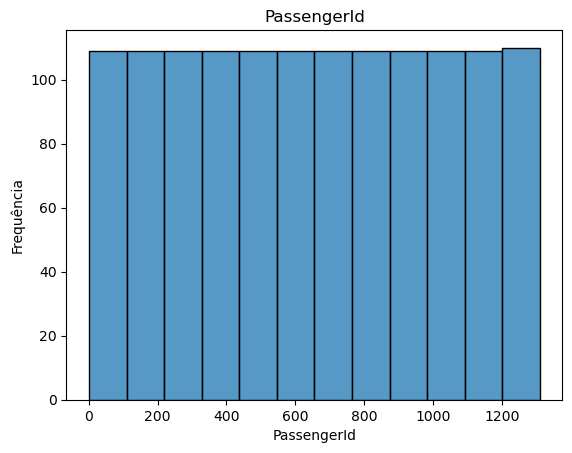

In [81]:
variaveis3 = ["Fare", "Age","PassengerId"]
for var in variaveis3:
    hist_plot(var)

<Axes: >

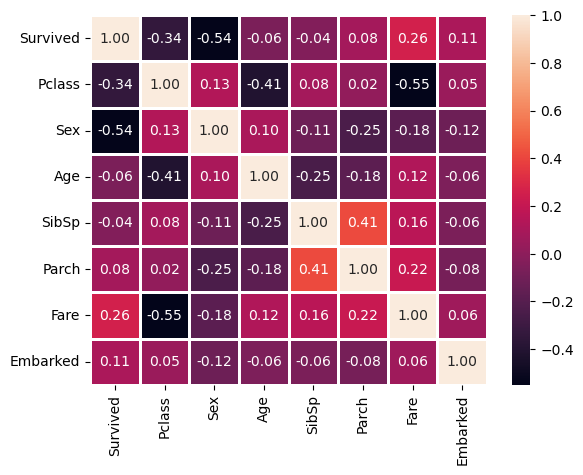

In [14]:
# Verificando a correlação entre as variaveis
df.corr()
sns.heatmap(df.corr(), annot = True, linecolor = 'w', linewidths=1, fmt = '.2f')

As colunas que tiveram uma correlação mais alta e baixa com Survived foram Pclass e Fare, entretando vamos observar o que acontece com outras variaveis também relacionadas como Sex e Parch.

Colocando em perspectiva a média de cada valor em relação à sua sobrevivência.

In [116]:
# Pclass x Survived
df[["Pclass","Survived"]].groupby(["Pclass"], as_index = False).mean().sort_values(by="Survived",ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Quanto mais luxuosa a class, maior a probabilidade de sobrevivencia.

In [9]:
# Fare x Survived
df[['Fare', 'Survived']].groupby(['Fare'], as_index = False).mean().sort_values(by='Survived', ascending = False).dropna()

,Fare,Survived
247,512.3292,1.0
196,57.9792,1.0
89,13.8583,1.0
88,13.7917,1.0
86,13.4167,1.0
...,...,...
103,15.5500,0.0
180,47.1000,0.0
179,46.9000,0.0
178,42.4000,0.0


Como vimos no mapa de calor, apesar de haver alguma relação entre o quanto se pagou na tarifa e sua relação na sobrevivencia, mas isso é nem sempre observavel.

In [131]:
# Sex x Survived
df[['Sex', "Survived"]].groupby(['Sex'], as_index= False).mean().sort_values(by='Survived', ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


Exatamente como foi esperado, as mulheres possuem maior probabilidade de sobreviver.

In [134]:
# Parch x Survived
df[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending = False).dropna()

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


Não poderiamos dizer que quanto maior a quantidade de filhos maior a probabilidade de sobrevivência.

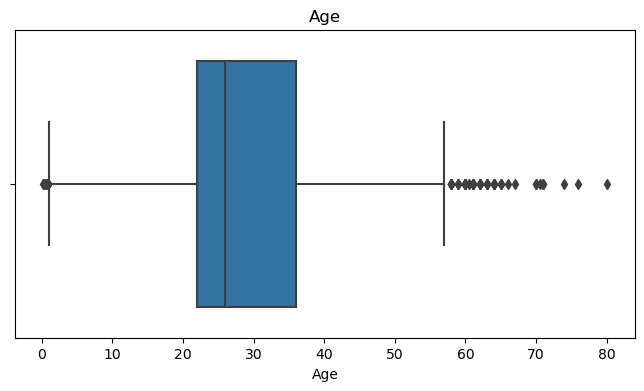

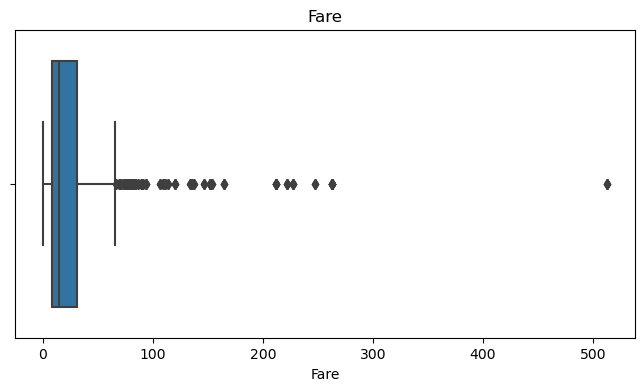

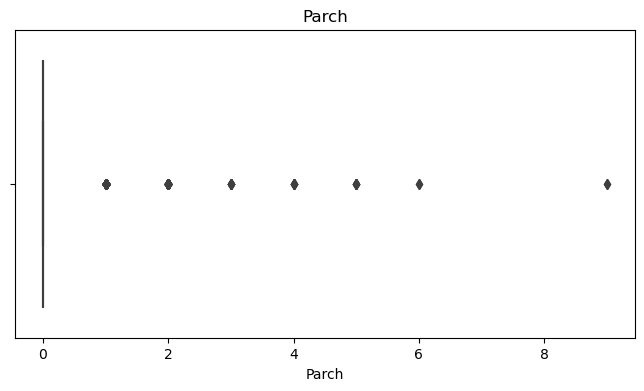

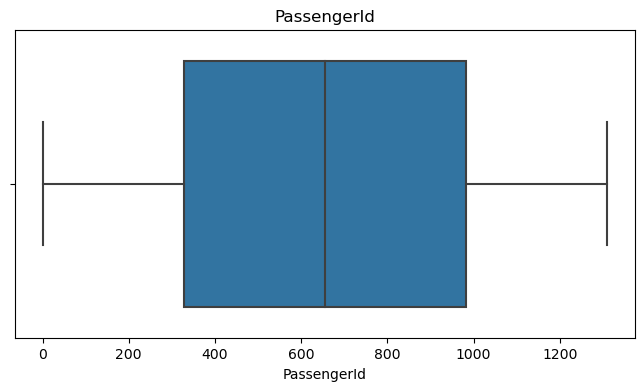

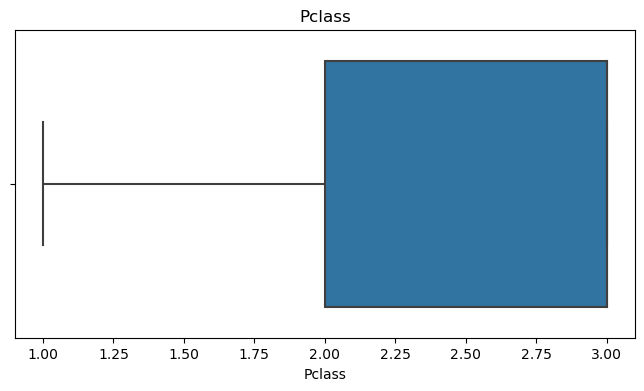

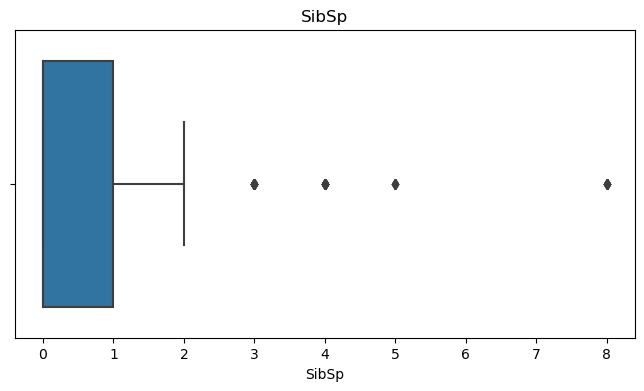

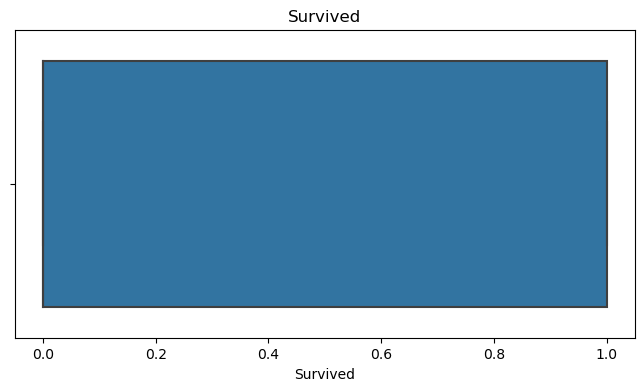

In [10]:
# Boxplots
num_columns = df.select_dtypes(include=['float64', 'int64']).columns
for column in num_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[column])
    plt.title(column)
    plt.show()

## Modelagem

Para os modelos preditivos usaremos a regressão logistica, KNN e o XGBoost.

In [29]:
# ML models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier

# Preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics

In [16]:
x = df.drop('Survived', axis = 1)
y = df['Survived']

In [17]:
# Logistic Regression
model1 = LogisticRegression()
result1 = cross_val_score(model1, x, y, cv = 5)

In [22]:
print(result1.mean())

0.8002385286548239


In [21]:
# KNeighborsClassifier
model2 = KNeighborsClassifier()
result2 = cross_val_score(model2, x, y, cv = 5)

In [23]:
print(result2.mean())

0.6913941372167473


In [24]:
# XGBClassifier
model3 = XGBClassifier()
result3 = cross_val_score(model3, x, y, cv = 5)

In [25]:
print(result3.mean())

0.8114807607808675


In [32]:
# LGBMClassifier
model4 = LGBMClassifier()
result4 = cross_val_score(model4, x, y, cv = 5)

[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000063 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 203
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [37]:
print(result4.mean())

0.8193333751804659


In [36]:
# RandomForestClassifier
model5 = RandomForestClassifier()
result5 = cross_val_score(model5, x, y, cv = 5)
print(result5.mean())

0.8036344234511329


In [39]:
# GradientBoostingClassifier
model6 = GradientBoostingClassifier()
result6 = cross_val_score(model6, x, y, cv = 5)
print(result6.mean())

0.8238152030632101


In [41]:
# ExtraTreesClassifier
model7 = ExtraTreesClassifier()
result7 = cross_val_score(model7, x, y, cv = 5)
print(result7.mean())

0.7935032326909799


## Resultados

In [49]:
models = pd.DataFrame({
    "Model" : ["LogisticRegression", "KNeighborsClassifier", "XGBClassifier", "LGBMClassifier",  "RandomForestClassifier", "GradientBoostingClassifier", "ExtraTreesClassifier"],
    "Accuracy score" : [result1.mean(), result2.mean(), result3.mean(), result4.mean(), result5.mean(), result6.mean(), result7.mean()]
})
models.sort_values(by = "Accuracy score", ascending = False)

,Model,Accuracy score
5,GradientBoostingClassifier,0.823815
3,LGBMClassifier,0.819333
2,XGBClassifier,0.811481
4,RandomForestClassifier,0.803634
0,LogisticRegression,0.800239
6,ExtraTreesClassifier,0.793503
1,KNeighborsClassifier,0.691394


Apesar de não termos otimizado os hiperparâmetros e nem trabalho mais eficientemente no pré-processamento, nosso melhor modelo ainda foi capaz de entregar uma acuracia de 82,3%, um resultado bem satisfatorio considerando tal situação.